In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import os
from glob import glob #para enumerar lo archivos en un directorio para leerlos
import pywt

import librosa #probando librosa, despues se explorar con otras como speech recognition
import librosa.display
import IPython.display as ipd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Importar audios


#Audios fake

In [ ]:
def extract_features(file):
    try:
        # Cargar el archivo de audio
        y, sr = librosa.load(file, sr=None)

        # Calcular las características
        amplitude = np.max(np.abs(y))
        zero_crossing_rate = np.mean(librosa.feature.zero_crossing_rate(y))
        energy = np.mean(librosa.feature.rms(y=y))
        rmse = np.mean(librosa.feature.rms(y=y))
        spectral_centroid = np.mean(librosa.feature.spectral_centroid(y=y, sr=sr))
        mfccs = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13), axis=1)
        spectral_bandwidth = np.mean(librosa.feature.spectral_bandwidth(y=y, sr=sr))

        return [amplitude, zero_crossing_rate, energy, rmse, spectral_centroid, *mfccs, spectral_bandwidth]
    except Exception as e:
        print(f"Error al procesar {file}: {e}")
        return None

# Directorio donde se encuentran los archivos de audio
audio_directory = "/content/drive/MyDrive/Practica IA BGH/SET DATOS VOICE/for-original/audio/fake"

# Lista para almacenar las características
features = []

# Extraer características para cada archivo de audio
for root, dirs, files in os.walk(audio_directory):
    for file in files:
        file_path = os.path.join(root, file)
        file_features = extract_features(file_path)
        if file_features:
            features.append([file] + file_features)  # Agregar el nombre del archivo como primer elemento

# Nombre de las características
feature_names = ["Nombre de archivo", "Amplitud", "Zero Crossing Rate", "Energía", "RMSE", "Spectral Centroid"]
feature_names += [f"MFCC{i+1}" for i in range(13)]
feature_names.append("Spectral Bandwidth")

# Crear un DataFrame
df = pd.DataFrame(features, columns=feature_names)

# Guardar el DataFrame en un archivo CSV
df.to_csv('audio_fake.csv', index=False)

<ipython-input-62-4195aa03fcc6>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file, sr=None)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Error al procesar /content/drive/MyDrive/Practica IA BGH/SET DATOS VOICE/for-original/audio/fake/file31606.mp3: 
Error al procesar /content/drive/MyDrive/Practica IA BGH/SET DATOS VOICE/for-original/audio/fake/file16165.mp3: 


In [ ]:
df

,Nombre de archivo,Amplitud,Zero Crossing Rate,Energía,RMSE,Spectral Centroid,MFCC1,MFCC2,MFCC3,MFCC4,MFCC5,MFCC6,MFCC7,MFCC8,MFCC9,MFCC10,MFCC11,MFCC12,MFCC13,Spectral Bandwidth
0,file4840.mp3,0.371704,0.126716,0.059073,0.059073,2058.557604,-260.855896,122.096313,-10.473313,7.241580,-1.153925,8.520425,-21.148323,-7.296533,9.844723,-10.148356,-1.751814,-1.904691,-12.813506,2020.770475
1,file4656.mp3,0.431381,0.172642,0.065739,0.065739,2532.759494,-241.283142,102.241821,-15.508652,10.774731,-9.253472,0.861016,-17.351460,-5.360281,0.564937,-5.851278,-9.881651,-2.894705,-12.036260,2100.960591
2,file4819.mp3,0.614080,0.104559,0.074672,0.074672,1511.092259,-305.822418,53.077148,-6.707771,29.473928,-11.758523,-2.306712,-15.152139,-0.124423,-16.134453,-4.859498,-8.257484,-3.980872,-2.645127,1305.686265
3,file4867.wav,0.525360,0.142843,0.085306,0.085306,2430.491982,-362.964661,77.121170,3.720571,15.389645,1.939530,-25.535469,-10.128425,-22.929253,-23.938990,-8.143371,-11.462385,-0.464975,-6.379569,1867.274297
4,file4813.mp3,0.458196,0.172570,0.037386,0.037386,1825.890672,-401.220490,46.096371,4.907990,19.946945,-6.046036,6.081191,-9.005062,7.753033,-2.319364,1.966322,-10.803967,1.742282,-7.119557,1340.366604
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5388,file12300.wav,0.835236,0.116826,0.091339,0.091339,2022.879063,-307.777710,100.369827,-29.601162,34.071972,1.120138,-34.478081,1.753899,15.605544,-27.209341,-12.677620,-0.697254,-17.246010,-0.576147,1619.932920
5389,file12272.mp3,0.726005,0.062384,0.066930,0.066930,977.200903,-364.658112,66.583412,-30.642950,17.872654,-12.853289,6.246665,-20.710070,-5.942308,-10.565707,-9.005660,-7.192125,-7.878477,-0.417178,870.243805
5390,file12137.mp3,0.483030,0.102155,0.030048,0.030048,1174.616063,-449.198578,56.336086,5.955359,29.194437,-0.425979,5.219650,0.316870,2.602726,-8.840279,-3.446180,-6.069253,1.263510,-8.121511,1084.341210
5391,file12295.mp3,0.535685,0.097435,0.035150,0.035150,1201.375827,-422.638794,78.733360,1.688270,26.953476,8.796626,5.605244,-5.966290,2.174429,-3.584567,-3.868879,-3.348945,2.920404,-10.361404,1164.417517


In [ ]:
# Contar los valores nulos en cada columna
print(df.isnull().sum())

Nombre de archivo     0
Amplitud              0
Zero Crossing Rate    0
Energía               0
RMSE                  0
Spectral Centroid     0
MFCC1                 0
MFCC2                 0
MFCC3                 0
MFCC4                 0
MFCC5                 0
MFCC6                 0
MFCC7                 0
MFCC8                 0
MFCC9                 0
MFCC10                0
MFCC11                0
MFCC12                0
MFCC13                0
Spectral Bandwidth    0
dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5393 entries, 0 to 5392
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Nombre de archivo   5393 non-null   object 
 1   Amplitud            5393 non-null   float32
 2   Zero Crossing Rate  5393 non-null   float64
 3   Energía             5393 non-null   float32
 4   RMSE                5393 non-null   float32
 5   Spectral Centroid   5393 non-null   float64
 6   MFCC1               5393 non-null   float32
 7   MFCC2               5393 non-null   float32
 8   MFCC3               5393 non-null   float32
 9   MFCC4               5393 non-null   float32
 10  MFCC5               5393 non-null   float32
 11  MFCC6               5393 non-null   float32
 12  MFCC7               5393 non-null   float32
 13  MFCC8               5393 non-null   float32
 14  MFCC9               5393 non-null   float32
 15  MFCC10              5393 non-null   float32
 16  MFCC11

#Audios reales

In [ ]:
def extract_features(file):
    try:
        # Cargar el archivo de audio
        y, sr = librosa.load(file, sr=None)

        # Calcular las características
        amplitude = np.max(np.abs(y))
        zero_crossing_rate = np.mean(librosa.feature.zero_crossing_rate(y))
        energy = np.mean(librosa.feature.rms(y=y))
        rmse = np.mean(librosa.feature.rms(y=y))
        spectral_centroid = np.mean(librosa.feature.spectral_centroid(y=y, sr=sr))
        mfccs = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13), axis=1)
        spectral_bandwidth = np.mean(librosa.feature.spectral_bandwidth(y=y, sr=sr))

        return [amplitude, zero_crossing_rate, energy, rmse, spectral_centroid, *mfccs, spectral_bandwidth]
    except Exception as e:
        print(f"Error al procesar {file}: {e}")
        return None

# Directorio donde se encuentran los archivos de audio
audio_directory = "/content/drive/MyDrive/Practica IA BGH/SET DATOS VOICE/for-original/audio/real"

# Lista para almacenar las características
features = []

# Extraer características para cada archivo de audio
for root, dirs, files in os.walk(audio_directory):
    for file in files:
        file_path = os.path.join(root, file)
        file_features = extract_features(file_path)
        if file_features:
            features.append([file] + file_features)  # Agregar el nombre del archivo como primer elemento

# Nombre de las características
feature_names = ["Nombre de archivo", "Amplitud", "Zero Crossing Rate", "Energía", "RMSE", "Spectral Centroid"]
feature_names += [f"MFCC{i+1}" for i in range(13)]
feature_names.append("Spectral Bandwidth")

# Crear un DataFrame
df_real = pd.DataFrame(features, columns=feature_names)

# Guardar el DataFrame en un archivo CSV
df_real.to_csv('audio_real.csv', index=False)

In [ ]:
df_real


,Nombre de archivo,Amplitud,Zero Crossing Rate,Energía,RMSE,Spectral Centroid,MFCC1,MFCC2,MFCC3,MFCC4,MFCC5,MFCC6,MFCC7,MFCC8,MFCC9,MFCC10,MFCC11,MFCC12,MFCC13,Spectral Bandwidth
0,file4344.wav,0.406616,0.005421,0.057139,0.057139,933.061186,-376.891235,72.368195,4.006534,25.570831,4.731569,6.071611,5.088619,5.537173,1.110015,13.049829,2.185911,6.293352,4.287291,1514.821994
1,file4315.wav,0.619965,0.125497,0.066254,0.066254,2230.418262,-305.733917,90.653542,-2.163476,5.952115,-24.995615,-30.109734,-16.253412,-14.527376,-13.332109,-7.080903,-23.022326,0.455656,-17.661238,1914.200294
2,file4213.wav,0.742737,0.183583,0.044459,0.044459,3052.690511,-324.032837,58.011055,9.880567,20.513697,-12.112849,-20.874449,-20.510223,-14.674287,-21.997032,-1.831584,-18.615477,-4.471828,-13.683266,2201.073524
3,file4236.wav,0.450073,0.103097,0.037337,0.037337,1229.635196,-450.005859,79.590408,10.769869,36.166107,-3.573102,23.456369,-12.577264,14.271315,-6.867017,13.303284,5.718338,11.785347,6.089962,1159.173988
4,file4257.wav,0.490814,0.087877,0.039077,0.039077,1753.169219,-287.272644,87.594986,4.082759,16.678604,7.377982,4.294011,4.135851,-2.523825,9.174694,2.621738,-4.745914,7.103048,-5.244060,1899.354171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5395,file12219.wav,0.415955,0.143459,0.049590,0.049590,2333.266026,-316.976654,94.330132,-4.125084,21.418924,-15.965795,-20.925303,-22.198189,-33.804008,-13.178148,0.466484,-22.497219,-8.722607,-17.923035,1909.070019
5396,file12245.wav,0.385803,0.138995,0.041179,0.041179,1683.858639,-322.342224,101.600517,-13.278803,33.555546,-24.967485,-3.669229,-34.834747,-6.074828,-13.063853,-3.437854,-6.963272,-6.333961,-6.820524,1401.730051
5397,file12293.wav,0.507812,0.161843,0.046130,0.046130,2549.660570,-325.077362,71.723824,-0.164336,18.027678,-8.813526,-17.301287,-22.732010,-19.574606,-14.648958,-7.897980,-20.680775,-6.938567,-11.755890,1944.991450
5398,file12209.wav,1.000000,0.205460,0.056307,0.056307,2209.625670,-239.910233,68.662895,-18.183233,38.102463,-19.266548,10.650543,-26.437717,12.970275,-11.711308,11.780951,-11.978092,2.126164,-4.799430,1635.312804


In [ ]:
# Contar los valores nulos en cada columna
print(df_real.isnull().sum())

Nombre de archivo     0
Amplitud              0
Zero Crossing Rate    0
Energía               0
RMSE                  0
Spectral Centroid     0
MFCC1                 0
MFCC2                 0
MFCC3                 0
MFCC4                 0
MFCC5                 0
MFCC6                 0
MFCC7                 0
MFCC8                 0
MFCC9                 0
MFCC10                0
MFCC11                0
MFCC12                0
MFCC13                0
Spectral Bandwidth    0
dtype: int64


In [ ]:
df_real.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5400 entries, 0 to 5399
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Nombre de archivo   5400 non-null   object 
 1   Amplitud            5400 non-null   float32
 2   Zero Crossing Rate  5400 non-null   float64
 3   Energía             5400 non-null   float32
 4   RMSE                5400 non-null   float32
 5   Spectral Centroid   5400 non-null   float64
 6   MFCC1               5400 non-null   float32
 7   MFCC2               5400 non-null   float32
 8   MFCC3               5400 non-null   float32
 9   MFCC4               5400 non-null   float32
 10  MFCC5               5400 non-null   float32
 11  MFCC6               5400 non-null   float32
 12  MFCC7               5400 non-null   float32
 13  MFCC8               5400 non-null   float32
 14  MFCC9               5400 non-null   float32
 15  MFCC10              5400 non-null   float32
 16  MFCC11

Explicacion de los metodos de librosa:

a-librosa.load(audio): Este método carga un archivo de audio desde la ruta especificada por audio y devuelve dos valores: audio_data y sr.
-audio_data: es una matriz unidimensional que contiene los datos de la señal de audio.
-sr: es la tasa de muestreo (sample rate) de la señal de audio, es decir, el número de muestras tomadas por segundo para representar la señal.

b-librosa.feature.rhythm.tempo(y=audio_data, sr=sr): Este método calcula el tempo de la señal de audio.
y: representa la señal de audio de entrada.
sr: es la tasa de muestreo de la señal de audio.
El método devuelve un array de tempos estimados. En este caso, la variable tempo contendrá el tempo estimado de la señal de audio.

c-librosa.feature.rms(y=audio_data): Este método calcula el valor RMS (Root Mean Square) de la señal de audio.
y: representa la señal de audio de entrada.
El método devuelve un array de valores RMS. En este caso, la variable rms contendrá el valor RMS promedio de la señal de audio.

d-librosa.feature.spectral_centroid(y=audio_data, sr=sr): Este método calcula el centroide espectral de la señal de audio.
y: representa la señal de audio de entrada.
sr: es la tasa de muestreo de la señal de audio.
El método devuelve un array de valores de centroides espectrales. En este caso, la variable spectral_centroid contendrá el centroide espectral promedio de la señal de audio.

Onda de audio fake

In [ ]:
audio_1="/content/drive/MyDrive/Practica IA BGH/SET DATOS VOICE/for-original/audio/fake/file1.mp3"

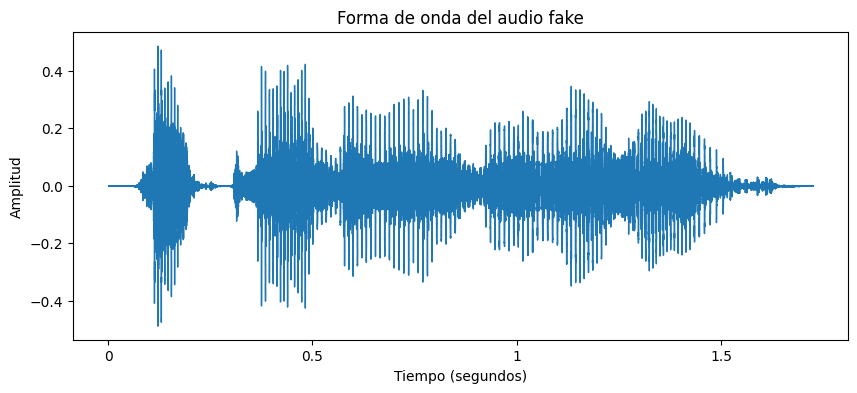

In [ ]:
# Cargar el archivo de audio
y, sr = librosa.load(audio_1)

# Visualizar la forma de onda del audio
plt.figure(figsize=(10, 4))
librosa.display.waveshow(y, sr=sr)
plt.title('Forma de onda del audio fake')
plt.xlabel('Tiempo (segundos)')
plt.ylabel('Amplitud')
plt.show()

Onda de audio real

In [ ]:
# Ruta al archivo de audio
audio_2 = "/content/drive/MyDrive/Practica IA BGH/SET DATOS VOICE/for-original/audio/real/file10004.wav"

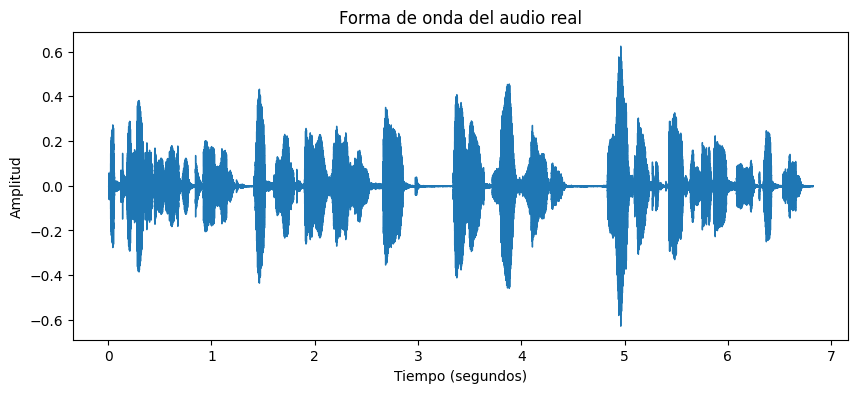

In [ ]:
# Cargar el archivo de audio
y, sr = librosa.load(audio_2)

# Visualizar la forma de onda del audio
plt.figure(figsize=(10, 4))
librosa.display.waveshow(y, sr=sr)
plt.title('Forma de onda del audio real')
plt.xlabel('Tiempo (segundos)')
plt.ylabel('Amplitud')
plt.show()

In [ ]:
sample_size = 100
real_sample = df_real['RMSE'].sample(n=sample_size, random_state=42).values
fake_sample = df['RMSE'].sample(n=sample_size, random_state=42).values

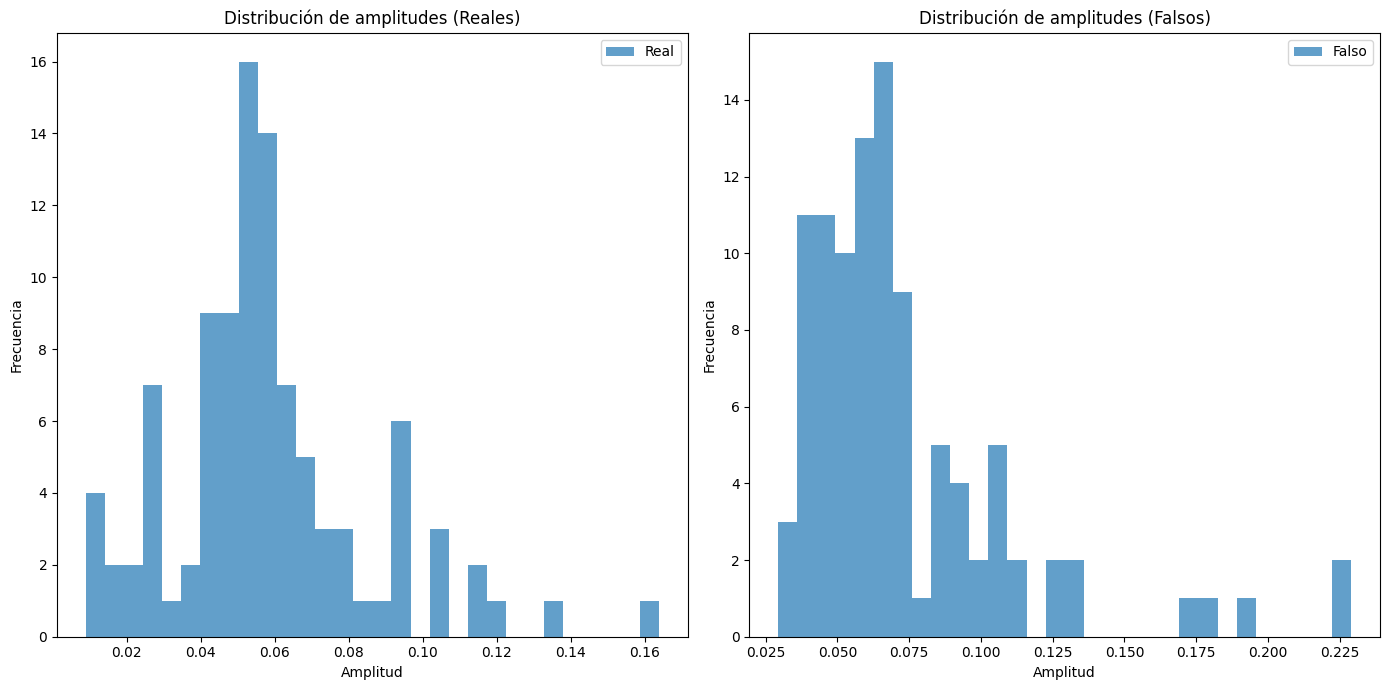

In [ ]:
plt.figure(figsize=(14, 7))

# Histograma de amplitudes reales
plt.subplot(1, 2, 1)
plt.hist(real_sample, bins=30, alpha=0.7, label='Real')
plt.xlabel('Amplitud')
plt.ylabel('Frecuencia')
plt.title('Distribución de amplitudes (Reales)')
plt.legend()

# Histograma de amplitudes falsas
plt.subplot(1, 2, 2)
plt.hist(fake_sample, bins=30, alpha=0.7, label='Falso')
plt.xlabel('Amplitud')
plt.ylabel('Frecuencia')
plt.title('Distribución de amplitudes (Falsos)')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
sample_size = 100
real_sample = df_real['Zero Crossing Rate'].sample(n=sample_size, random_state=42).values
fake_sample = df['Zero Crossing Rate'].sample(n=sample_size, random_state=42).values

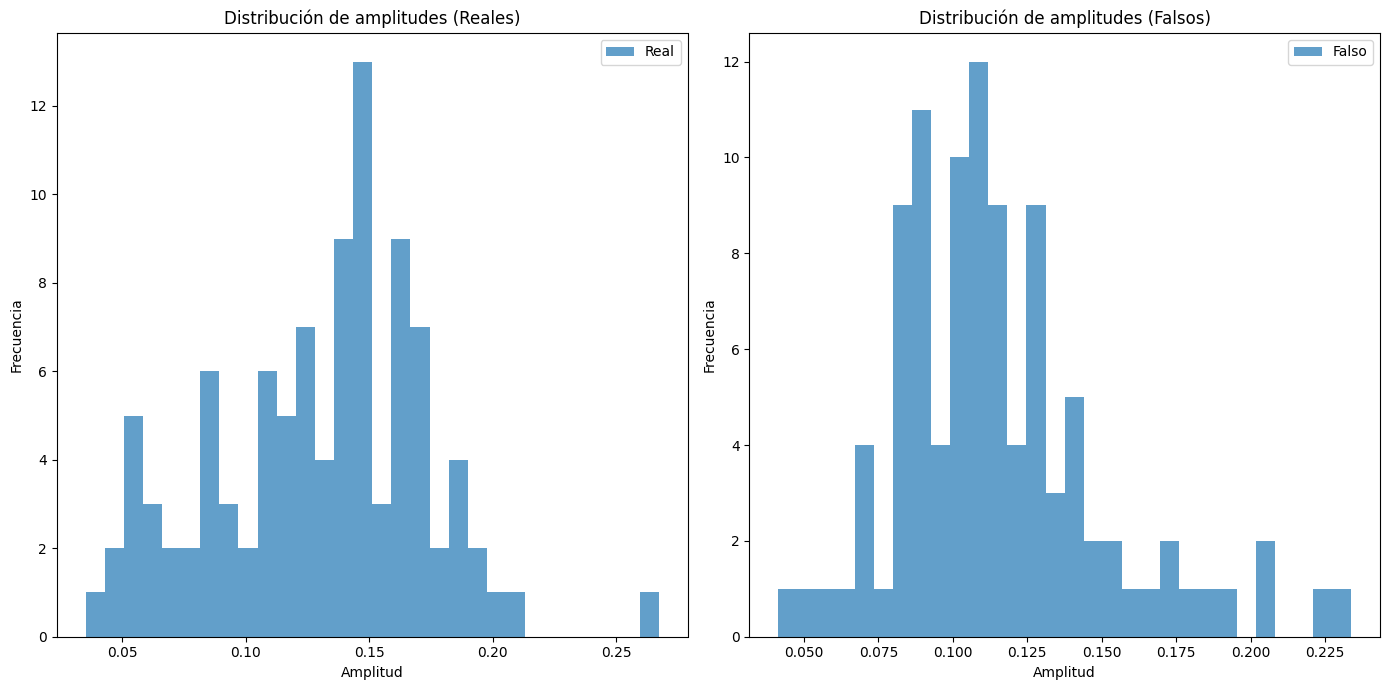

In [ ]:
plt.figure(figsize=(14, 7))

# Histograma de amplitudes reales
plt.subplot(1, 2, 1)
plt.hist(real_sample, bins=30, alpha=0.7, label='Real')
plt.xlabel('Amplitud')
plt.ylabel('Frecuencia')
plt.title('Distribución de amplitudes (Reales)')
plt.legend()

# Histograma de amplitudes falsas
plt.subplot(1, 2, 2)
plt.hist(fake_sample, bins=30, alpha=0.7, label='Falso')
plt.xlabel('Amplitud')
plt.ylabel('Frecuencia')
plt.title('Distribución de amplitudes (Falsos)')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
sample_size = 100
real_sample = df_real['Amplitud'].sample(n=sample_size, random_state=42).values
fake_sample = df['Amplitud'].sample(n=sample_size, random_state=42).values

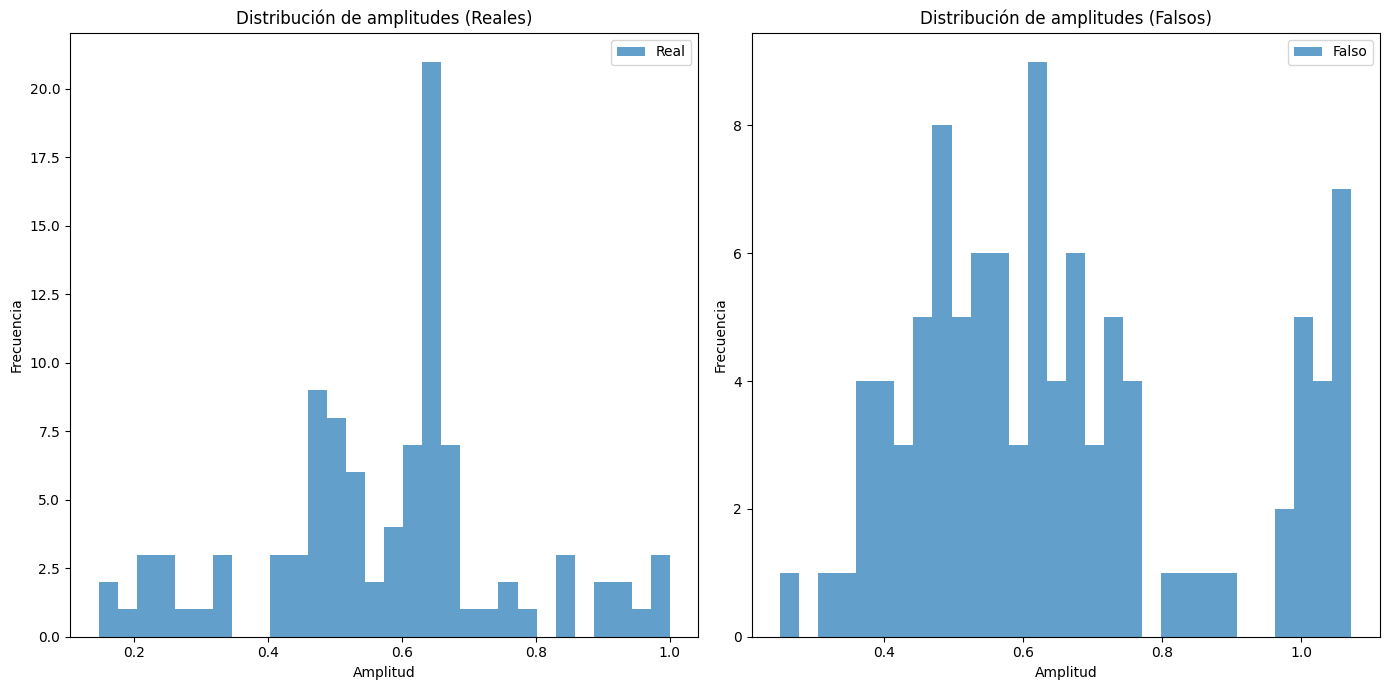

In [ ]:
plt.figure(figsize=(14, 7))

# Histograma de amplitudes reales
plt.subplot(1, 2, 1)
plt.hist(real_sample, bins=30, alpha=0.7, label='Real')
plt.xlabel('Amplitud')
plt.ylabel('Frecuencia')
plt.title('Distribución de amplitudes (Reales)')
plt.legend()

# Histograma de amplitudes falsas
plt.subplot(1, 2, 2)
plt.hist(fake_sample, bins=30, alpha=0.7, label='Falso')
plt.xlabel('Amplitud')
plt.ylabel('Frecuencia')
plt.title('Distribución de amplitudes (Falsos)')
plt.legend()

plt.tight_layout()
plt.show()

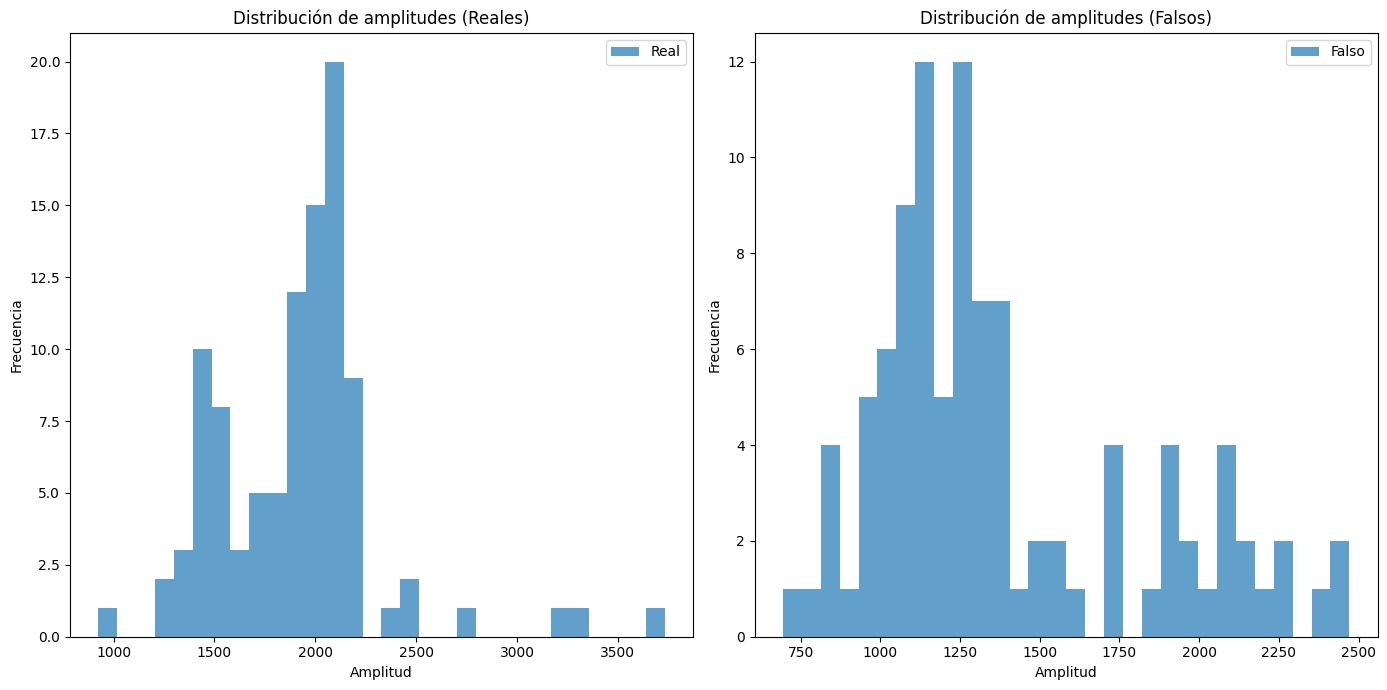

In [ ]:
sample_size = 100
real_sample = df_real['Spectral Bandwidth'].sample(n=sample_size, random_state=42).values
fake_sample = df['Spectral Bandwidth'].sample(n=sample_size, random_state=42).values

plt.figure(figsize=(14, 7))

# Histograma de amplitudes reales
plt.subplot(1, 2, 1)
plt.hist(real_sample, bins=30, alpha=0.7, label='Real')
plt.xlabel('Amplitud')
plt.ylabel('Frecuencia')
plt.title('Distribución de amplitudes (Reales)')
plt.legend()

# Histograma de amplitudes falsas
plt.subplot(1, 2, 2)
plt.hist(fake_sample, bins=30, alpha=0.7, label='Falso')
plt.xlabel('Amplitud')
plt.ylabel('Frecuencia')
plt.title('Distribución de amplitudes (Falsos)')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Cargar los datasets
df1 = df
df2 = df_real

# Función para comparar características de MFCC
def compare_mfcc(df1, df2):
    # Lista de nombres de las columnas de MFCC
    mfcc_columns = ["MFCC1", "MFCC2", "MFCC3", "MFCC4", "MFCC5", "MFCC6", "MFCC7", "MFCC8", "MFCC9", "MFCC10", "MFCC11", "MFCC12", "MFCC13"]

    # Seleccionar solo las columnas de MFCC
    df1_mfcc = df1[mfcc_columns]
    df2_mfcc = df2[mfcc_columns]

    # Calcular la media de cada columna de MFCC para ambos conjuntos de datos
    df1_mfcc_mean = df1_mfcc.mean()
    df2_mfcc_mean = df2_mfcc.mean()

    return df1_mfcc_mean, df2_mfcc_mean

# Comparar características de MFCC
df1_mfcc_mean, df2_mfcc_mean = compare_mfcc(df1, df2)

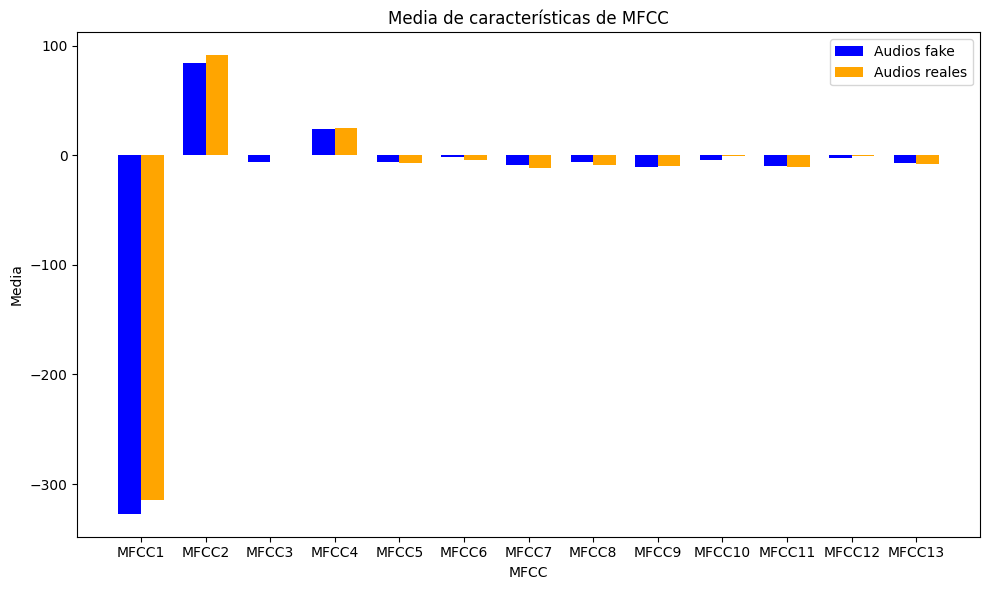

In [ ]:
# Gráfico de barras de las medias de las características de MFCC
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = range(len(df1_mfcc_mean))
plt.bar(index, df1_mfcc_mean, bar_width, label='Audios fake', color='blue')
plt.bar([i + bar_width for i in index], df2_mfcc_mean, bar_width, label='Audios reales', color='orange')
plt.xlabel('MFCC')
plt.ylabel('Media')
plt.title('Media de características de MFCC')
plt.xticks([i + bar_width / 2 for i in index], [f"MFCC{i}" for i in range(1, 14)])
plt.legend()
plt.tight_layout()
plt.show()

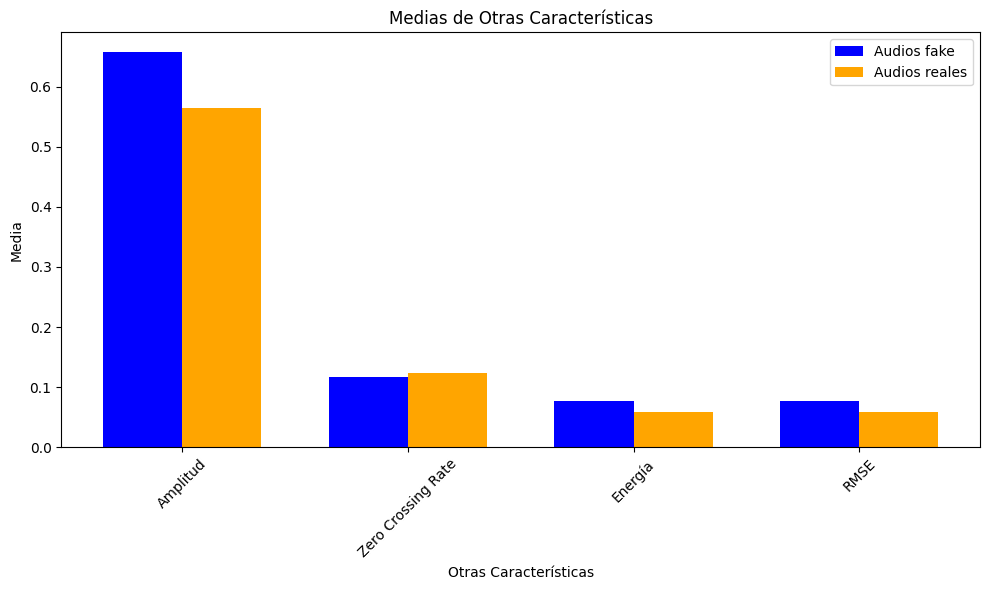

In [ ]:
# Comparar otras características
other_columns = ['Amplitud', 'Zero Crossing Rate', 'Energía','RMSE']

# Obtener las medias de cada característica para ambos conjuntos de datos
mean_df1 = df1[other_columns].mean()
mean_df2 = df2[other_columns].mean()

# Configurar la ubicación de las barras
bar_width = 0.35
index = np.arange(len(other_columns))

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(index, mean_df1, bar_width, label='Audios fake', color='blue')
plt.bar(index + bar_width, mean_df2, bar_width, label='Audios reales', color='orange')

# Personalizar el gráfico
plt.xlabel('Otras Características')
plt.ylabel('Media')
plt.title('Medias de Otras Características')
plt.xticks(index + bar_width / 2, other_columns, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()